In [37]:
# Задание:
# Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
# Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. 
# При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
#
# Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [38]:
import pandas as pd
import numpy as np

import scipy.stats as ss
from scipy.stats import shapiro, mannwhitneyu

In [39]:
# Читаем данные с результатами A/B теста
problem2 = pd.read_csv('https://stepik.org/media/attachments/lesson/409318/problem2.csv', sep = ';')

In [40]:
problem2.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [41]:
problem2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [42]:
problem2.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [43]:
# Предварительно посмотрим на данные, проверим были ли изменения значимыми

In [44]:
# запишем всех пользователей группы а в отдельную таблицу
testgroup_a_users = problem2.query('testgroup == "a"')

In [45]:
testgroup_a_users.head()

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a


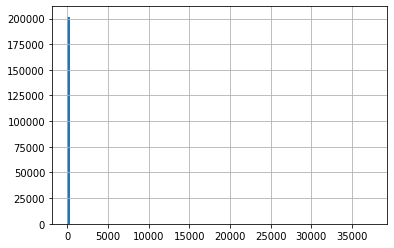

In [85]:
# Посмотрим распределение сумм оплат группы а
testgroup_a_users.revenue.hist(bins=50)

In [47]:
# Проверим распределение сумм оплат группы а на нормальность
# Используем критерий Шапиро
# Преварительно сформируем сэмпл из данных
df_sample_a = testgroup_a_users['revenue'].sample(1000, random_state=17)

In [48]:
# Расчет теста Шапиро
shapiro_test_a = ss.shapiro(df_sample_a)

shapiro_test_a

(0.06614720821380615, 0.0)

In [49]:
# p-value теста Шапиро для группы а меньше заданного уровень значимости (0.05). Отклоняем нулевую гипотезу.
# Распределение переменной revenue группы а не является нормальным. 

In [ ]:
# Проделаем тоже самое с группой b

In [50]:
# запишем всех пользователей группы b в отдельную таблицу
testgroup_b_users = problem2.query('testgroup == "b"')

In [51]:
testgroup_b_users.head()

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b


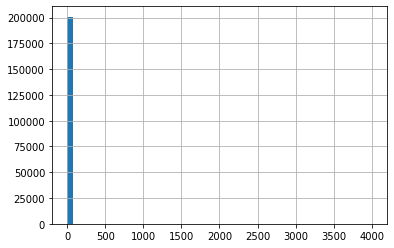

In [86]:
# Посмотрим распределение сумм оплат группы b
testgroup_b_users.revenue.hist(bins=50)

In [53]:
# Проверим распределение сумм оплат группы b на нормальность
# Используем критерий Шапиро
# Преварительно сформируем сэмпл из данных
df_sample_b = testgroup_b_users['revenue'].sample(1000, random_state=17)

In [54]:
# Расчет теста Шапиро
shapiro_test_b = ss.shapiro(df_sample_b)

shapiro_test_b

(0.06715953350067139, 0.0)

In [55]:
# p-value теста Шапиро для группы b меньше заданного уровень значимости (0.05). Отклоняем нулевую гипотезу.
# Распределение переменной revenue группы b не является нормальным. 

In [56]:
# Распределение переменных revenue группы a и b не является нормальным, поэтому для проверки гипотезы я использую 
# критерий Манна-Уитни.
U1, p = mannwhitneyu(testgroup_a_users.revenue, testgroup_b_users.revenue)

U1, p

(20468349325.0, 0.03134850658037196)

In [57]:
# p-value критерия mann-whitney равен 0.03, что меньше, чем заданный уровень значимости (0.05).
# Поэтому для данного критерия мы можем отвергнуть нулевую гипотезу.
# Мы получили статистически значимые различия в значении средней суммы покупок пользователей (ARPU), поэтому
# имеет смысл дальнейший анализ и выбор лучшего вариант теста. 

In [58]:
# ARPU - Cредний доход с привлечённого пользователя. 
# Для ответа на вопрос задания разделим формулу ARPU на составные части.
# ARPU = Конверсия * ARPPU
# Конверсию и ARPPU (Cредний доход на платящего пользователя (то есть клиента)) также разнесем на составные части.
# Конверсия = Число клиентов / Число пользователей, ARPPU = Доход / Число клиентов
# Посчитаем составные части формул для каждой группы пользователей теста.

In [59]:
# Посчитаем количество пользователей в группе а
# и проверим, что они все уникальные 
testgroup_a_users.user_id.count()

202103

In [60]:
testgroup_a_users.user_id.nunique()

202103

In [61]:
testgroup_a_users_count = testgroup_a_users.user_id.count()

In [62]:
# Таблица с клиентам группы а
testgroup_a_clients = problem2.query('testgroup == "a" and revenue != 0')

In [63]:
testgroup_a_clients.head()

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a


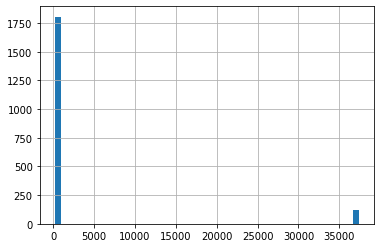

In [93]:
# Посмотрим на распределение revenue в таблице с клиентам группы a
testgroup_a_clients.revenue.hist(bins=50)

In [64]:
# Количество клиентов группы а
testgroup_a_clients_count = testgroup_a_clients.user_id.count()

In [65]:
# Доход от клиентов группы а
testgroup_a_revenue = testgroup_a_clients.revenue.sum()

In [66]:
# ARPPU группы а
testgroup_a_ARPPU = testgroup_a_revenue/testgroup_a_clients_count

In [67]:
# Конверсия группы а
testgroup_a_conversion = testgroup_a_clients_count/testgroup_a_users_count

In [68]:
# ARPU группы а
testgroup_a_ARPU = testgroup_a_ARPPU * testgroup_a_conversion

In [69]:
# Проделаем тоже самое с группой b

In [70]:
# Посчитаем количество пользователей в группе b
# и проверим, что они все уникальные 
testgroup_b_users.user_id.count()

202667

In [71]:
testgroup_b_users.user_id.nunique()

202667

In [72]:
testgroup_b_users_count = testgroup_b_users.user_id.count()

In [73]:
# Таблица с клиентам группы b
testgroup_b_clients = problem2.query('testgroup == "b" and revenue != 0')

In [74]:
testgroup_b_clients.head()

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b


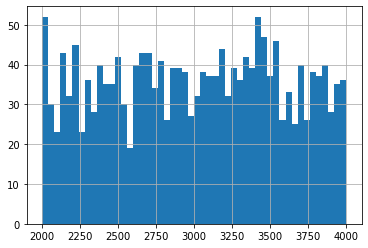

In [92]:
# Посмотрим на распределение revenue в таблице с клиентам группы b
testgroup_b_clients.revenue.hist(bins=50)

In [75]:
# Количество клиентов группы b
testgroup_b_clients_count = testgroup_b_clients.user_id.count() 

In [76]:
# Доход от клиентов группы b
testgroup_b_revenue = testgroup_b_clients.revenue.sum()

In [77]:
# ARPPU группы b
testgroup_b_ARPPU = testgroup_b_revenue/testgroup_b_clients_count

In [78]:
# Конверсия группы b
testgroup_b_conversion = testgroup_b_clients_count/testgroup_b_users_count

In [79]:
# ARPU группы b
testgroup_b_ARPU = testgroup_b_ARPPU * testgroup_b_conversion

In [80]:
# Сведем полученные показатели в одну таблицу для наглядности 
a = [testgroup_a_users_count, testgroup_a_clients_count, testgroup_a_revenue, testgroup_a_ARPPU, testgroup_a_conversion,testgroup_a_ARPU]
b = [testgroup_b_users_count, testgroup_b_clients_count, testgroup_b_revenue, testgroup_b_ARPPU, testgroup_b_conversion,testgroup_b_ARPU]

In [81]:
df = pd.DataFrame({'a': a, 'b': b}, index=['users_count', 'clients_count', 'revenue', 'ARPPU', 'conversion', 'ARPU'] )

In [82]:
df

,a,b
users_count,2.021030e+05,2.026670e+05
clients_count,1.928000e+03,1.805000e+03
revenue,5.136189e+06,5.421603e+06
ARPPU,2.663998e+03,3.003658e+03
conversion,9.539690e-03,8.906235e-03
ARPU,2.541372e+01,2.675129e+01


In [83]:
# Посчитаем относительное изменение показателей в % 
100 *((df.b - df.a)/df.b)

users_count       0.278289
clients_count    -6.814404
revenue           5.264384
ARPPU            11.308202
conversion       -7.112487
ARPU              5.000009
dtype: float64

In [ ]:
# Выводы:  
# Был проведен предварительынй анализ полученных данных. Проверка распределения revenue групп тестом Шапиро 
# показала, что распределение данных не является нормальным. Выбранный критерий Манна-Уитни показал, что различия между 
# средним revenue в группах являются статистически значимыми.
#
# Для каждой группы пользователей были вычислены показатели, обозначенные следующим образом: 
#    конверсия - conversion,
#    средний доход на платящего пользователя (то есть клиента) - ARPPU, 
#    средний доход с привлечённого пользователя - ARPU, 
#    доход - revenue.
#
# Сравнительный анализ показал, что ARPU в тестовой группе выше на 5%, чем в контрольной. Доход и ARPPU также
# выше в тестовой группе, чем в контрольной, на 5.3% и 11.3% соответственно. Однако конверсия в тестовой группе 
# снизилась на 7.1%. Таким образом, увеличилась стоимость привлечение клиента (CAC = Расходы_на_привлечение/Число_клиентов).
# Если стоимость привлечения будет выше дохода пользователя, то продукт станет убыточным. 
#
# При единичном или кратковременном проведении акций выгоден набор предложений для тестовой группы пользователей.
# Однако этот набор предложений приводит к снижению конверсии и увеличивает стоимость привлечение клиента. 
# Следовательно, при длительной перспективе может привести к снижению общего дохода и убыткам.